In [2]:
import numpy as np 
import pandas as pd 
import os
from tensorflow import keras
import matplotlib.pyplot as plt

for dirname, _, filenames in os.walk('Documentos/data/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [3]:
import pandas as pd
import numpy as np

In [4]:
datasix1 = pd.read_csv('data/GP1_0.6_marker.csv')
dataseven2 = pd.read_csv('data/GP1_0.7_marker.csv')
datasix1.head()

,L_FCC_x,L_FM1_x,L_FM2_x,L_FM5_x,R_FCC_x,R_FM1_x,R_FM2_x,R_FM5_x,L_FCC_y,L_FM1_y,...,R_FM2_y,R_FM5_y,L_FCC_z,L_FM1_z,L_FM2_z,L_FM5_z,R_FCC_z,R_FM1_z,R_FM2_z,R_FM5_z
0,1.127087,1.332534,1.328893,1.305142,0.804407,1.017605,1.017485,0.991847,0.575397,0.587244,...,0.448289,0.396237,0.090627,0.084655,0.095734,0.067779,0.081946,0.058241,0.063082,0.048901
1,1.131831,1.337421,1.333921,1.310700,0.802088,1.015296,1.015148,0.989509,0.575327,0.586249,...,0.448250,0.396193,0.090195,0.086384,0.097342,0.069010,0.082106,0.058203,0.063062,0.048842
2,1.136807,1.342521,1.339171,1.316510,0.799617,1.012833,1.012659,0.987012,0.575228,0.585174,...,0.448206,0.396145,0.089767,0.088228,0.099043,0.070312,0.082279,0.058166,0.063040,0.048781
3,1.141961,1.347770,1.344579,1.322506,0.797009,1.010229,1.010033,0.984370,0.575094,0.584023,...,0.448160,0.396093,0.089354,0.090171,0.100820,0.071672,0.082464,0.058132,0.063014,0.048717
4,1.147230,1.353103,1.350078,1.328615,0.794281,1.007500,1.007287,0.981602,0.574925,0.582801,...,0.448109,0.396038,0.088963,0.092198,0.102656,0.073079,0.082663,0.058101,0.062985,0.048651


In [5]:
data1 = pd.DataFrame({'secim':np.zeros(12000)})
data2 = pd.DataFrame({'secim':np.ones(12000)})

data2 = pd.concat([dataseven2,data2],axis=1)
data1 = pd.concat([datasix1,data1],axis=1)

data = data1.append(data2,ignore_index=True)
data.head()

C:\Users\gabri\AppData\Local\Temp\ipykernel_12752\3726432371.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data1.append(data2,ignore_index=True)


,L_FCC_x,L_FM1_x,L_FM2_x,L_FM5_x,R_FCC_x,R_FM1_x,R_FM2_x,R_FM5_x,L_FCC_y,L_FM1_y,...,R_FM5_y,L_FCC_z,L_FM1_z,L_FM2_z,L_FM5_z,R_FCC_z,R_FM1_z,R_FM2_z,R_FM5_z,secim
0,1.127087,1.332534,1.328893,1.305142,0.804407,1.017605,1.017485,0.991847,0.575397,0.587244,...,0.396237,0.090627,0.084655,0.095734,0.067779,0.081946,0.058241,0.063082,0.048901,0.0
1,1.131831,1.337421,1.333921,1.310700,0.802088,1.015296,1.015148,0.989509,0.575327,0.586249,...,0.396193,0.090195,0.086384,0.097342,0.069010,0.082106,0.058203,0.063062,0.048842,0.0
2,1.136807,1.342521,1.339171,1.316510,0.799617,1.012833,1.012659,0.987012,0.575228,0.585174,...,0.396145,0.089767,0.088228,0.099043,0.070312,0.082279,0.058166,0.063040,0.048781,0.0
3,1.141961,1.347770,1.344579,1.322506,0.797009,1.010229,1.010033,0.984370,0.575094,0.584023,...,0.396093,0.089354,0.090171,0.100820,0.071672,0.082464,0.058132,0.063014,0.048717,0.0
4,1.147230,1.353103,1.350078,1.328615,0.794281,1.007500,1.007287,0.981602,0.574925,0.582801,...,0.396038,0.088963,0.092198,0.102656,0.073079,0.082663,0.058101,0.062985,0.048651,0.0


In [6]:
x = data.drop(["secim"],axis=1)
y = data.secim.values
x.head()

,L_FCC_x,L_FM1_x,L_FM2_x,L_FM5_x,R_FCC_x,R_FM1_x,R_FM2_x,R_FM5_x,L_FCC_y,L_FM1_y,...,R_FM2_y,R_FM5_y,L_FCC_z,L_FM1_z,L_FM2_z,L_FM5_z,R_FCC_z,R_FM1_z,R_FM2_z,R_FM5_z
0,1.127087,1.332534,1.328893,1.305142,0.804407,1.017605,1.017485,0.991847,0.575397,0.587244,...,0.448289,0.396237,0.090627,0.084655,0.095734,0.067779,0.081946,0.058241,0.063082,0.048901
1,1.131831,1.337421,1.333921,1.310700,0.802088,1.015296,1.015148,0.989509,0.575327,0.586249,...,0.448250,0.396193,0.090195,0.086384,0.097342,0.069010,0.082106,0.058203,0.063062,0.048842
2,1.136807,1.342521,1.339171,1.316510,0.799617,1.012833,1.012659,0.987012,0.575228,0.585174,...,0.448206,0.396145,0.089767,0.088228,0.099043,0.070312,0.082279,0.058166,0.063040,0.048781
3,1.141961,1.347770,1.344579,1.322506,0.797009,1.010229,1.010033,0.984370,0.575094,0.584023,...,0.448160,0.396093,0.089354,0.090171,0.100820,0.071672,0.082464,0.058132,0.063014,0.048717
4,1.147230,1.353103,1.350078,1.328615,0.794281,1.007500,1.007287,0.981602,0.574925,0.582801,...,0.448109,0.396038,0.088963,0.092198,0.102656,0.073079,0.082663,0.058101,0.062985,0.048651


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [8]:
y_train.shape

(16800,)

In [9]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)
print('accuracy of bayes in test data is :', nb.score(x_test,y_test))

accuracy of bayes in test data is : 0.9383333333333334


In [10]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(x_train,y_train)
print('Random Forest accuracy on test data is : ',rf.score(x_test,y_test))

Random Forest accuracy on test data is :  1.0


In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
print("test accuracy for Log Regressin is  {}".format(lr.score(x_test,y_test)))

test accuracy for Log Regressin is  0.9868055555555556


In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3) #n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

print("k={} nn score:{}".format(3,knn.score(x_test,y_test)))


k=3 nn score:1.0


In [13]:
np_train = x_train.to_numpy()
X_Train = np_train.reshape((x_train.shape[0], x_train.shape[1], 1))
X_Train

array([[[0.734571],
        [0.937121],
        [0.942865],
        ...,
        [0.105638],
        [0.106499],
        [0.072446]],

       [[0.500432],
        [0.704159],
        [0.71038 ],
        ...,
        [0.1191  ],
        [0.121995],
        [0.088341]],

       [[1.025505],
        [1.23174 ],
        [1.229148],
        ...,
        [0.059497],
        [0.062703],
        [0.046014]],

       ...,

       [[1.085408],
        [1.291474],
        [1.29771 ],
        ...,
        [0.084774],
        [0.084325],
        [0.083821]],

       [[1.016685],
        [1.221561],
        [1.219106],
        ...,
        [0.055976],
        [0.062491],
        [0.048439]],

       [[0.616632],
        [0.797831],
        [0.805251],
        ...,
        [0.068827],
        [0.075445],
        [0.053528]]])

In [14]:
num_classes = len(np.unique(y_train))
num_classes

2

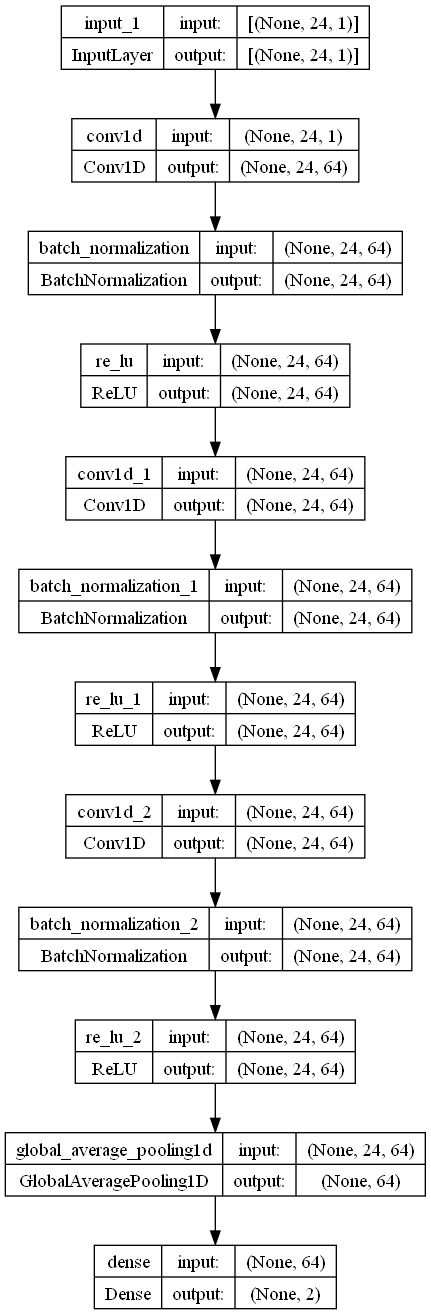

In [15]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=X_Train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [16]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_Train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
420/420 [==============================] - 2s 3ms/step - loss: 0.1443 - sparse_categorical_accuracy: 0.9511 - val_loss: 1.9386 - val_sparse_categorical_accuracy: 0.5086 - lr: 0.0010
Epoch 2/500
420/420 [==============================] - 1s 3ms/step - loss: 0.0547 - sparse_categorical_accuracy: 0.9841 - val_loss: 0.0613 - val_sparse_categorical_accuracy: 0.9774 - lr: 0.0010
Epoch 3/500
420/420 [==============================] - 1s 3ms/step - loss: 0.0473 - sparse_categorical_accuracy: 0.9854 - val_loss: 0.2290 - val_sparse_categorical_accuracy: 0.9149 - lr: 0.0010
Epoch 4/500
420/420 [==============================] - 1s 3ms/step - loss: 0.0373 - sparse_categorical_accuracy: 0.9891 - val_loss: 1.9283 - val_sparse_categorical_accuracy: 0.5789 - lr: 0.0010
Epoch 5/500
420/420 [==============================] - 1s 3ms/step - loss: 0.0383 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.5625 - val_sparse_categorical_accuracy: 0.8390 - lr: 0.0010
Epoch 6/500
420/420 [=========

420/420 [==============================] - 1s 3ms/step - loss: 0.0106 - sparse_categorical_accuracy: 0.9962 - val_loss: 0.2515 - val_sparse_categorical_accuracy: 0.9068 - lr: 0.0010
Epoch 44/500
420/420 [==============================] - 1s 3ms/step - loss: 0.0061 - sparse_categorical_accuracy: 0.9981 - val_loss: 0.0989 - val_sparse_categorical_accuracy: 0.9658 - lr: 0.0010
Epoch 45/500
420/420 [==============================] - 1s 3ms/step - loss: 0.0127 - sparse_categorical_accuracy: 0.9957 - val_loss: 0.0190 - val_sparse_categorical_accuracy: 0.9940 - lr: 0.0010
Epoch 46/500
420/420 [==============================] - 1s 3ms/step - loss: 0.0120 - sparse_categorical_accuracy: 0.9962 - val_loss: 4.8517 - val_sparse_categorical_accuracy: 0.5232 - lr: 0.0010
Epoch 47/500
420/420 [==============================] - 1s 3ms/step - loss: 0.0061 - sparse_categorical_accuracy: 0.9981 - val_loss: 0.1468 - val_sparse_categorical_accuracy: 0.9452 - lr: 0.0010
Epoch 48/500
420/420 [================

Epoch 85/500
420/420 [==============================] - 1s 3ms/step - loss: 0.0020 - sparse_categorical_accuracy: 0.9996 - val_loss: 4.3269e-04 - val_sparse_categorical_accuracy: 1.0000 - lr: 5.0000e-04
Epoch 86/500
420/420 [==============================] - 1s 3ms/step - loss: 0.0036 - sparse_categorical_accuracy: 0.9988 - val_loss: 2.1921e-04 - val_sparse_categorical_accuracy: 1.0000 - lr: 5.0000e-04
Epoch 87/500
420/420 [==============================] - 1s 3ms/step - loss: 9.6775e-04 - sparse_categorical_accuracy: 0.9999 - val_loss: 3.5595e-04 - val_sparse_categorical_accuracy: 1.0000 - lr: 5.0000e-04
Epoch 88/500
420/420 [==============================] - 1s 3ms/step - loss: 0.0016 - sparse_categorical_accuracy: 0.9998 - val_loss: 0.0020 - val_sparse_categorical_accuracy: 1.0000 - lr: 5.0000e-04
Epoch 89/500
420/420 [==============================] - 1s 3ms/step - loss: 0.0020 - sparse_categorical_accuracy: 0.9997 - val_loss: 5.0099e-04 - val_sparse_categorical_accuracy: 1.0000 - 

420/420 [==============================] - 1s 3ms/step - loss: 5.7579e-04 - sparse_categorical_accuracy: 0.9999 - val_loss: 3.2736e-04 - val_sparse_categorical_accuracy: 1.0000 - lr: 2.5000e-04
Epoch 126/500
420/420 [==============================] - 1s 3ms/step - loss: 5.6773e-04 - sparse_categorical_accuracy: 0.9999 - val_loss: 9.2227e-05 - val_sparse_categorical_accuracy: 1.0000 - lr: 2.5000e-04
Epoch 127/500
420/420 [==============================] - 1s 3ms/step - loss: 6.4793e-04 - sparse_categorical_accuracy: 0.9999 - val_loss: 1.5939e-04 - val_sparse_categorical_accuracy: 1.0000 - lr: 2.5000e-04
Epoch 128/500
420/420 [==============================] - 1s 3ms/step - loss: 5.0892e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 7.4775e-05 - val_sparse_categorical_accuracy: 1.0000 - lr: 2.5000e-04
Epoch 129/500
420/420 [==============================] - 1s 3ms/step - loss: 4.6950e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0206 - val_sparse_categorical_accuracy: 0.

Epoch 165/500
420/420 [==============================] - 1s 3ms/step - loss: 4.2284e-04 - sparse_categorical_accuracy: 0.9999 - val_loss: 6.0710e-05 - val_sparse_categorical_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 166/500
420/420 [==============================] - 1s 3ms/step - loss: 2.5091e-04 - sparse_categorical_accuracy: 0.9999 - val_loss: 5.7352e-05 - val_sparse_categorical_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 167/500
420/420 [==============================] - 1s 3ms/step - loss: 2.2082e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.3774e-05 - val_sparse_categorical_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 168/500
420/420 [==============================] - 1s 3ms/step - loss: 2.1648e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.6013e-05 - val_sparse_categorical_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 169/500
420/420 [==============================] - 1s 3ms/step - loss: 2.5527e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.1170e-04 - val_sparse_catego

420/420 [==============================] - 1s 3ms/step - loss: 1.5100e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.7882e-04 - val_sparse_categorical_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 205/500
420/420 [==============================] - 1s 3ms/step - loss: 1.8261e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 5.9946e-05 - val_sparse_categorical_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 206/500
420/420 [==============================] - 1s 3ms/step - loss: 3.2889e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.7892e-05 - val_sparse_categorical_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 207/500
420/420 [==============================] - 1s 3ms/step - loss: 3.1990e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.0476e-05 - val_sparse_categorical_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 208/500
420/420 [==============================] - 1s 3ms/step - loss: 2.6871e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.3232e-05 - val_sparse_categorical_accuracy

420/420 [==============================] - 1s 3ms/step - loss: 2.2679e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 9.2025e-05 - val_sparse_categorical_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 244/500
420/420 [==============================] - 1s 3ms/step - loss: 2.9340e-04 - sparse_categorical_accuracy: 0.9999 - val_loss: 2.3647e-05 - val_sparse_categorical_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 245/500
420/420 [==============================] - 1s 3ms/step - loss: 2.4087e-04 - sparse_categorical_accuracy: 0.9999 - val_loss: 2.1635e-05 - val_sparse_categorical_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 246/500
420/420 [==============================] - 1s 3ms/step - loss: 1.3652e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 2.7053e-05 - val_sparse_categorical_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 247/500
420/420 [==============================] - 1s 3ms/step - loss: 9.7860e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 2.2429e-05 - val_sparse_categorical_accuracy

420/420 [==============================] - 1s 3ms/step - loss: 1.0080e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 2.1820e-05 - val_sparse_categorical_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 283/500
420/420 [==============================] - 1s 3ms/step - loss: 2.0005e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 2.0758e-05 - val_sparse_categorical_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 284/500
420/420 [==============================] - 1s 3ms/step - loss: 2.3121e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 2.4964e-05 - val_sparse_categorical_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 285/500
420/420 [==============================] - 1s 3ms/step - loss: 9.8593e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.6015e-05 - val_sparse_categorical_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 286/500
420/420 [==============================] - 1s 3ms/step - loss: 1.2494e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 2.3997e-05 - val_sparse_categorical_accuracy

420/420 [==============================] - 1s 3ms/step - loss: 1.2205e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 2.0421e-05 - val_sparse_categorical_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 322/500
420/420 [==============================] - 1s 3ms/step - loss: 7.8883e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.4705e-05 - val_sparse_categorical_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 323/500
420/420 [==============================] - 1s 3ms/step - loss: 2.2409e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.6770e-05 - val_sparse_categorical_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 324/500
420/420 [==============================] - 1s 3ms/step - loss: 2.0436e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 4.8053e-05 - val_sparse_categorical_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 325/500
420/420 [==============================] - 1s 3ms/step - loss: 6.5680e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.5645e-05 - val_sparse_categorical_accuracy

420/420 [==============================] - 1s 3ms/step - loss: 1.1662e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 8.6383e-06 - val_sparse_categorical_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 361/500
420/420 [==============================] - 1s 3ms/step - loss: 4.9368e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 7.8442e-06 - val_sparse_categorical_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 362/500
420/420 [==============================] - 1s 3ms/step - loss: 9.3278e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.1375e-04 - val_sparse_categorical_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 363/500
420/420 [==============================] - 1s 3ms/step - loss: 1.8538e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 2.0990e-05 - val_sparse_categorical_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 364/500
420/420 [==============================] - 1s 3ms/step - loss: 8.4752e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.0402e-05 - val_sparse_categorical_accuracy

420/420 [==============================] - 1s 3ms/step - loss: 1.0138e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 2.1400e-05 - val_sparse_categorical_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 400/500
420/420 [==============================] - 1s 3ms/step - loss: 7.3584e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 2.2385e-05 - val_sparse_categorical_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 401/500
420/420 [==============================] - 1s 3ms/step - loss: 2.9354e-04 - sparse_categorical_accuracy: 0.9999 - val_loss: 0.0220 - val_sparse_categorical_accuracy: 0.9908 - lr: 1.0000e-04
Epoch 402/500
420/420 [==============================] - 1s 3ms/step - loss: 1.3329e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.0266e-05 - val_sparse_categorical_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 403/500
420/420 [==============================] - 1s 3ms/step - loss: 6.1520e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 9.7395e-06 - val_sparse_categorical_accuracy: 1.

420/420 [==============================] - 1s 3ms/step - loss: 7.5334e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.3881e-05 - val_sparse_categorical_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 439/500
420/420 [==============================] - 1s 3ms/step - loss: 6.2756e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 6.5142e-05 - val_sparse_categorical_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 440/500
420/420 [==============================] - 1s 3ms/step - loss: 3.3699e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 7.5203e-06 - val_sparse_categorical_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 441/500
420/420 [==============================] - 1s 3ms/step - loss: 5.8089e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.4212e-05 - val_sparse_categorical_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 442/500
420/420 [==============================] - 1s 3ms/step - loss: 8.7584e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.6701e-05 - val_sparse_categorical_accuracy

420/420 [==============================] - 1s 3ms/step - loss: 4.7138e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 9.3553e-06 - val_sparse_categorical_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 478/500
420/420 [==============================] - 1s 3ms/step - loss: 5.9186e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 6.7851e-06 - val_sparse_categorical_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 479/500
420/420 [==============================] - 1s 3ms/step - loss: 6.4351e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.1194e-05 - val_sparse_categorical_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 480/500
420/420 [==============================] - 1s 3ms/step - loss: 5.5307e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.3121e-05 - val_sparse_categorical_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 481/500
420/420 [==============================] - 1s 3ms/step - loss: 2.2460e-04 - sparse_categorical_accuracy: 0.9999 - val_loss: 0.0057 - val_sparse_categorical_accuracy: 0.

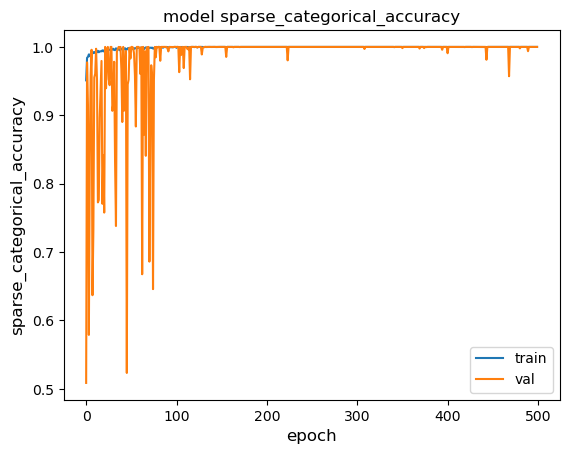

In [17]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()